In [31]:
!pip install pymongo

In [42]:
import pandas as pd
import pymongo

In [36]:
import pymongo
from urllib.parse import quote_plus

# MongoDB connection parameters
username = "x23242361"
password = "housing@1234"
cluster_url = "housing.dzyvgkh.mongodb.net"


# Encode the username and password
encoded_username = quote_plus(username)
encoded_password = quote_plus(password)


# Construct the connection string
connection_string = f"mongodb+srv://{encoded_username}:{encoded_password}@{cluster_url}/?retryWrites=true&w=majority"

# Create a MongoClient object
client = pymongo.MongoClient(connection_string)

# Test the connection by listing the available databases
print(client.list_database_names())

['construction_cost', 'sample_mflix', 'admin', 'local']


In [54]:
db = client['crime_ireland']

In [55]:
col = db['crime_col']

In [45]:
df = pd.read_csv('crime_dap.csv')

In [46]:
print(df.head())

            STATISTIC Label Quarter                 Garda Division  \
0  Recorded crime incidents  2003Q1  Cavan/Monaghan Garda Division   
1  Recorded crime incidents  2003Q1  Cavan/Monaghan Garda Division   
2  Recorded crime incidents  2003Q1  Cavan/Monaghan Garda Division   
3  Recorded crime incidents  2003Q1  Cavan/Monaghan Garda Division   
4  Recorded crime incidents  2003Q1  Cavan/Monaghan Garda Division   

                      Type of Offence    UNIT  VALUE  
0                   Homicide offences  Number    1.0  
1                              Murder  Number    0.0  
2                        Manslaughter  Number    0.0  
3                         Infanticide  Number    0.0  
4  Dangerous driving leading to death  Number    1.0  


In [47]:
df

STATISTIC Label Quarter                 Garda Division  \
0       Recorded crime incidents  2003Q1  Cavan/Monaghan Garda Division   
1       Recorded crime incidents  2003Q1  Cavan/Monaghan Garda Division   
2       Recorded crime incidents  2003Q1  Cavan/Monaghan Garda Division   
3       Recorded crime incidents  2003Q1  Cavan/Monaghan Garda Division   
4       Recorded crime incidents  2003Q1  Cavan/Monaghan Garda Division   
...                          ...     ...                            ...   
166987  Recorded crime incidents  2023Q4  D.M.R. Western Garda Division   
166988  Recorded crime incidents  2023Q4  D.M.R. Western Garda Division   
166989  Recorded crime incidents  2023Q4  D.M.R. Western Garda Division   
166990  Recorded crime incidents  2023Q4  D.M.R. Western Garda Division   
166991  Recorded crime incidents  2023Q4  D.M.R. Western Garda Division   

                                          Type of Offence    UNIT  VALUE  
0                                       Homicide offences  Number    1.0  
1                                                  Murder  Number    0.0  
2                                            Manslaughter  Number    0.0  
3                                             Infanticide  Number    0.0  
4                      Dangerous driving leading to death  Number    1.0  
...                                                   ...     ...    ...  
166987  Offences against government, justice procedure...  Number  390.0  
166988         Offences against government and its agents  Number    5.0  
166989  Organisation of crime and conspiracy to commit...  Number    NaN  
166990                   Perverting the course of justice  Number    NaN  
166991  Offences while in custody, breach of court orders  Number  385.0  

[166992 rows x 6 columns]

In [48]:
data = df.to_dict(orient='records')

In [51]:
data

[{'STATISTIC Label': 'Recorded crime incidents',
  'Quarter': '2003Q1',
  'Garda Division': 'Cavan/Monaghan Garda Division',
  'Type of Offence': 'Homicide offences',
  'UNIT': 'Number',
  'VALUE': 1.0},
 {'STATISTIC Label': 'Recorded crime incidents',
  'Quarter': '2003Q1',
  'Garda Division': 'Cavan/Monaghan Garda Division',
  'Type of Offence': 'Murder',
  'UNIT': 'Number',
  'VALUE': 0.0},
 {'STATISTIC Label': 'Recorded crime incidents',
  'Quarter': '2003Q1',
  'Garda Division': 'Cavan/Monaghan Garda Division',
  'Type of Offence': 'Manslaughter',
  'UNIT': 'Number',
  'VALUE': 0.0},
 {'STATISTIC Label': 'Recorded crime incidents',
  'Quarter': '2003Q1',
  'Garda Division': 'Cavan/Monaghan Garda Division',
  'Type of Offence': 'Infanticide',
  'UNIT': 'Number',
  'VALUE': 0.0},
 {'STATISTIC Label': 'Recorded crime incidents',
  'Quarter': '2003Q1',
  'Garda Division': 'Cavan/Monaghan Garda Division',
  'Type of Offence': 'Dangerous driving leading to death',
  'UNIT': 'Number',
  

In [52]:
type(data)

list

In [56]:
col.insert_many(data)

InsertManyResult([ObjectId('6632bd3789b29434224df2bc'), ObjectId('6632bd3789b29434224df2bd'), ObjectId('6632bd3789b29434224df2be'), ObjectId('6632bd3789b29434224df2bf'), ObjectId('6632bd3789b29434224df2c0'), ObjectId('6632bd3789b29434224df2c1'), ObjectId('6632bd3789b29434224df2c2'), ObjectId('6632bd3789b29434224df2c3'), ObjectId('6632bd3789b29434224df2c4'), ObjectId('6632bd3789b29434224df2c5'), ObjectId('6632bd3789b29434224df2c6'), ObjectId('6632bd3789b29434224df2c7'), ObjectId('6632bd3789b29434224df2c8'), ObjectId('6632bd3789b29434224df2c9'), ObjectId('6632bd3789b29434224df2ca'), ObjectId('6632bd3789b29434224df2cb'), ObjectId('6632bd3789b29434224df2cc'), ObjectId('6632bd3789b29434224df2cd'), ObjectId('6632bd3789b29434224df2ce'), ObjectId('6632bd3789b29434224df2cf'), ObjectId('6632bd3789b29434224df2d0'), ObjectId('6632bd3789b29434224df2d1'), ObjectId('6632bd3789b29434224df2d2'), ObjectId('6632bd3789b29434224df2d3'), ObjectId('6632bd3789b29434224df2d4'), ObjectId('6632bd3789b29434224df2

In [57]:
crimedata = list(col.find())

In [58]:
crimedata

[{'_id': ObjectId('6632bd3789b29434224df2bc'),
  'STATISTIC Label': 'Recorded crime incidents',
  'Quarter': '2003Q1',
  'Garda Division': 'Cavan/Monaghan Garda Division',
  'Type of Offence': 'Homicide offences',
  'UNIT': 'Number',
  'VALUE': 1.0},
 {'_id': ObjectId('6632bd3789b29434224df2bd'),
  'STATISTIC Label': 'Recorded crime incidents',
  'Quarter': '2003Q1',
  'Garda Division': 'Cavan/Monaghan Garda Division',
  'Type of Offence': 'Murder',
  'UNIT': 'Number',
  'VALUE': 0.0},
 {'_id': ObjectId('6632bd3789b29434224df2be'),
  'STATISTIC Label': 'Recorded crime incidents',
  'Quarter': '2003Q1',
  'Garda Division': 'Cavan/Monaghan Garda Division',
  'Type of Offence': 'Manslaughter',
  'UNIT': 'Number',
  'VALUE': 0.0},
 {'_id': ObjectId('6632bd3789b29434224df2bf'),
  'STATISTIC Label': 'Recorded crime incidents',
  'Quarter': '2003Q1',
  'Garda Division': 'Cavan/Monaghan Garda Division',
  'Type of Offence': 'Infanticide',
  'UNIT': 'Number',
  'VALUE': 0.0},
 {'_id': ObjectId(

In [60]:
def trans_doc (doc):
    return {
        'quarter': doc['Quarter'],
        'garda_div': doc['Garda Division'],
        'offence': doc['Type of Offence'],
        'value': doc['VALUE']
    }

In [61]:
struct_data = [trans_doc(doc) for doc in crimedata]

In [62]:
struct_data

[{'quarter': '2003Q1',
  'garda_div': 'Cavan/Monaghan Garda Division',
  'offence': 'Homicide offences',
  'value': 1.0},
 {'quarter': '2003Q1',
  'garda_div': 'Cavan/Monaghan Garda Division',
  'offence': 'Murder',
  'value': 0.0},
 {'quarter': '2003Q1',
  'garda_div': 'Cavan/Monaghan Garda Division',
  'offence': 'Manslaughter',
  'value': 0.0},
 {'quarter': '2003Q1',
  'garda_div': 'Cavan/Monaghan Garda Division',
  'offence': 'Infanticide',
  'value': 0.0},
 {'quarter': '2003Q1',
  'garda_div': 'Cavan/Monaghan Garda Division',
  'offence': 'Dangerous driving leading to death',
  'value': 1.0},
 {'quarter': '2003Q1',
  'garda_div': 'Cavan/Monaghan Garda Division',
  'offence': 'Sexual offences',
  'value': 23.0},
 {'quarter': '2003Q1',
  'garda_div': 'Cavan/Monaghan Garda Division',
  'offence': 'Rape and sexual assault',
  'value': 23.0},
 {'quarter': '2003Q1',
  'garda_div': 'Cavan/Monaghan Garda Division',
  'offence': 'Other sexual offences',
  'value': 0.0},
 {'quarter': '2003Q

In [63]:
crimedata_df = pd.DataFrame(struct_data)

In [64]:
crimedata_df

quarter                      garda_div  \
0       2003Q1  Cavan/Monaghan Garda Division   
1       2003Q1  Cavan/Monaghan Garda Division   
2       2003Q1  Cavan/Monaghan Garda Division   
3       2003Q1  Cavan/Monaghan Garda Division   
4       2003Q1  Cavan/Monaghan Garda Division   
...        ...                            ...   
166987  2023Q4  D.M.R. Western Garda Division   
166988  2023Q4  D.M.R. Western Garda Division   
166989  2023Q4  D.M.R. Western Garda Division   
166990  2023Q4  D.M.R. Western Garda Division   
166991  2023Q4  D.M.R. Western Garda Division   

                                                  offence  value  
0                                       Homicide offences    1.0  
1                                                  Murder    0.0  
2                                            Manslaughter    0.0  
3                                             Infanticide    0.0  
4                      Dangerous driving leading to death    1.0  
...                                                   ...    ...  
166987  Offences against government, justice procedure...  390.0  
166988         Offences against government and its agents    5.0  
166989  Organisation of crime and conspiracy to commit...    NaN  
166990                   Perverting the course of justice    NaN  
166991  Offences while in custody, breach of court orders  385.0  

[166992 rows x 4 columns]

In [65]:
dmr_rows = crimedata_df[crimedata_df['garda_div'].str.contains('D.M.R.')]

In [66]:
dmr_rows

quarter                            garda_div  \
1562    2003Q1  D.M.R. South Central Garda Division   
1563    2003Q1  D.M.R. South Central Garda Division   
1564    2003Q1  D.M.R. South Central Garda Division   
1565    2003Q1  D.M.R. South Central Garda Division   
1566    2003Q1  D.M.R. South Central Garda Division   
...        ...                                  ...   
166987  2023Q4        D.M.R. Western Garda Division   
166988  2023Q4        D.M.R. Western Garda Division   
166989  2023Q4        D.M.R. Western Garda Division   
166990  2023Q4        D.M.R. Western Garda Division   
166991  2023Q4        D.M.R. Western Garda Division   

                                                  offence  value  
1562                                    Homicide offences    2.0  
1563                                               Murder    1.0  
1564                                         Manslaughter    1.0  
1565                                          Infanticide    0.0  
1566                   Dangerous driving leading to death    0.0  
...                                                   ...    ...  
166987  Offences against government, justice procedure...  390.0  
166988         Offences against government and its agents    5.0  
166989  Organisation of crime and conspiracy to commit...    NaN  
166990                   Perverting the course of justice    NaN  
166991  Offences while in custody, breach of court orders  385.0  

[35784 rows x 4 columns]

In [75]:
#crimedata_df_new = crimedata_df.dropna()
crimedata_df_new = dmr_rows.fillna(0)

In [76]:
crimedata_df_new

quarter                            garda_div  \
1562    2003Q1  D.M.R. South Central Garda Division   
1563    2003Q1  D.M.R. South Central Garda Division   
1564    2003Q1  D.M.R. South Central Garda Division   
1565    2003Q1  D.M.R. South Central Garda Division   
1566    2003Q1  D.M.R. South Central Garda Division   
...        ...                                  ...   
166987  2023Q4        D.M.R. Western Garda Division   
166988  2023Q4        D.M.R. Western Garda Division   
166989  2023Q4        D.M.R. Western Garda Division   
166990  2023Q4        D.M.R. Western Garda Division   
166991  2023Q4        D.M.R. Western Garda Division   

                                                  offence  value  
1562                                    Homicide offences    2.0  
1563                                               Murder    1.0  
1564                                         Manslaughter    1.0  
1565                                          Infanticide    0.0  
1566                   Dangerous driving leading to death    0.0  
...                                                   ...    ...  
166987  Offences against government, justice procedure...  390.0  
166988         Offences against government and its agents    5.0  
166989  Organisation of crime and conspiracy to commit...    0.0  
166990                   Perverting the course of justice    0.0  
166991  Offences while in custody, breach of court orders  385.0  

[35784 rows x 4 columns]

In [77]:
crimedata_df_index = crimedata_df_new.reset_index(drop=True)

In [78]:
crimedata_df_index

quarter                            garda_div  \
0      2003Q1  D.M.R. South Central Garda Division   
1      2003Q1  D.M.R. South Central Garda Division   
2      2003Q1  D.M.R. South Central Garda Division   
3      2003Q1  D.M.R. South Central Garda Division   
4      2003Q1  D.M.R. South Central Garda Division   
...       ...                                  ...   
35779  2023Q4        D.M.R. Western Garda Division   
35780  2023Q4        D.M.R. Western Garda Division   
35781  2023Q4        D.M.R. Western Garda Division   
35782  2023Q4        D.M.R. Western Garda Division   
35783  2023Q4        D.M.R. Western Garda Division   

                                                 offence  value  
0                                      Homicide offences    2.0  
1                                                 Murder    1.0  
2                                           Manslaughter    1.0  
3                                            Infanticide    0.0  
4                     Dangerous driving leading to death    0.0  
...                                                  ...    ...  
35779  Offences against government, justice procedure...  390.0  
35780         Offences against government and its agents    5.0  
35781  Organisation of crime and conspiracy to commit...    0.0  
35782                   Perverting the course of justice    0.0  
35783  Offences while in custody, breach of court orders  385.0  

[35784 rows x 4 columns]

In [48]:
!pip install psycopg2

  Obtaining dependency information for psycopg2 from https://files.pythonhosted.org/packages/37/2c/5133dd3183a3bd82371569f0dd783e6927672de7e671b278ce248810b7f7/psycopg2-2.9.9-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
    --------------------------------------- 0.0/1.2 MB 162.5 kB/s eta 0:00:08
    --------------------------------------- 0.0/1.2 MB 162.5 kB/s eta 0:00:08
   -- ------------------------------------- 0.1/1.2 MB 435.7 kB/s eta 0:00:03
   ------------- -------------------------- 0.4/1.2 MB 1.8 MB/s eta 0:00:01
   ---------------------------- ----------- 0.8/1.2 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 3.7 MB/s eta 0:00:00


In [52]:
import psycopg2
import pandas as pd
import re
from sqlalchemy import create_engine, text
import numpy as np

In [53]:
db_params = {
    'host': "127.0.0.1",
    'database': 'postgres',
    'user': 'postgres',
    'password': 'daphne',
    'port': '5432'
}

In [54]:
conn = psycopg2.connect(
    host=db_params['host'],
    database=db_params['database'],
    user=db_params['user'],
    password=db_params['password'],
    port=db_params['port']
)

## Create a cursor object
cur = conn.cursor()

## Set autocommit to true so that every operation is committed without having to call conn.committ() after each command
conn.set_session(autocommit=True)

In [55]:
cur.execute("CREATE DATABASE crimedublin")

In [56]:
## Commit the changes and close the connection to the default database
conn.commit()
cur.close()
conn.close()

In [57]:
db_params['database'] = 'crimedublin'
engine = create_engine(f'postgresql://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}/{db_params["database"]}')

In [58]:
crimedata_df_index.to_sql('dublin_crime2003to2023', engine, if_exists='replace', index=False)

352

In [113]:
unique_garda = crimedata_df_index['garda_div'].unique()

In [114]:
unique_garda

array(['D.M.R. South Central Garda Division',
       'D.M.R. North Central Garda Division',
       'D.M.R. Northern Garda Division', 'D.M.R. Southern Garda Division',
       'D.M.R. Eastern Garda Division', 'D.M.R. Western Garda Division'],
      dtype=object)

In [115]:
unique_offence = crimedata_df_index['offence'].unique()

In [116]:
unique_offence

array(['Homicide offences', 'Murder', 'Manslaughter', 'Infanticide',
       'Dangerous driving leading to death', 'Sexual offences',
       'Rape and sexual assault', 'Other sexual offences',
       'Attempts/threats to murder, assaults, harassments and related offences',
       'Murder-attempt', 'Threat to kill or cause serious harm',
       'Harassment and related offences',
       'Assault causing harm, poisoning', 'Other assault',
       'Dangerous or negligent acts',
       'Dangerous driving causing serious bodily harm',
       'Driving/in charge of a vehicle while over legal alcohol limit',
       'Driving/in charge of a vehicle under the influence of drugs',
       'Endangerment with potential for serious harm/death',
       'Abandoning a child, child neglect and cruelty',
       'Unseaworthy/dangerous use of boat or ship',
       'False alarm/interference with aircraft or air transport facilities',
       'Endangering traffic offences', 'Kidnapping and related offences',
     

In [91]:
garda_north_central = crimedata_df_index[crimedata_df_index['garda_div'] == 'D.M.R. North Central Garda Division'].copy()

In [92]:
garda_north_central

quarter                            garda_div  \
71     2003Q1  D.M.R. North Central Garda Division   
72     2003Q1  D.M.R. North Central Garda Division   
73     2003Q1  D.M.R. North Central Garda Division   
74     2003Q1  D.M.R. North Central Garda Division   
75     2003Q1  D.M.R. North Central Garda Division   
...       ...                                  ...   
35495  2023Q4  D.M.R. North Central Garda Division   
35496  2023Q4  D.M.R. North Central Garda Division   
35497  2023Q4  D.M.R. North Central Garda Division   
35498  2023Q4  D.M.R. North Central Garda Division   
35499  2023Q4  D.M.R. North Central Garda Division   

                                                 offence   value  
71                                     Homicide offences     3.0  
72                                                Murder     2.0  
73                                          Manslaughter     1.0  
74                                           Infanticide     0.0  
75                    Dangerous driving leading to death     1.0  
...                                                  ...     ...  
35495  Offences against government, justice procedure...  1091.0  
35496         Offences against government and its agents    11.0  
35497  Organisation of crime and conspiracy to commit...     0.0  
35498                   Perverting the course of justice     1.0  
35499  Offences while in custody, breach of court orders  1079.0  

[5964 rows x 4 columns]

In [93]:
garda_north = crimedata_df_index[crimedata_df_index['garda_div'] == 'D.M.R. Northern Garda Division'].copy()

In [94]:
garda_north

quarter                       garda_div  \
142    2003Q1  D.M.R. Northern Garda Division   
143    2003Q1  D.M.R. Northern Garda Division   
144    2003Q1  D.M.R. Northern Garda Division   
145    2003Q1  D.M.R. Northern Garda Division   
146    2003Q1  D.M.R. Northern Garda Division   
...       ...                             ...   
35566  2023Q4  D.M.R. Northern Garda Division   
35567  2023Q4  D.M.R. Northern Garda Division   
35568  2023Q4  D.M.R. Northern Garda Division   
35569  2023Q4  D.M.R. Northern Garda Division   
35570  2023Q4  D.M.R. Northern Garda Division   

                                                 offence  value  
142                                    Homicide offences    0.0  
143                                               Murder    0.0  
144                                         Manslaughter    0.0  
145                                          Infanticide    0.0  
146                   Dangerous driving leading to death    0.0  
...                                                  ...    ...  
35566  Offences against government, justice procedure...  169.0  
35567         Offences against government and its agents    1.0  
35568  Organisation of crime and conspiracy to commit...    0.0  
35569                   Perverting the course of justice    0.0  
35570  Offences while in custody, breach of court orders  168.0  

[5964 rows x 4 columns]

In [98]:
garda_west = crimedata_df_index[crimedata_df_index['garda_div'] == 'D.M.R. Western Garda Division'].copy()

In [99]:
garda_west

quarter                      garda_div  \
355    2003Q1  D.M.R. Western Garda Division   
356    2003Q1  D.M.R. Western Garda Division   
357    2003Q1  D.M.R. Western Garda Division   
358    2003Q1  D.M.R. Western Garda Division   
359    2003Q1  D.M.R. Western Garda Division   
...       ...                            ...   
35779  2023Q4  D.M.R. Western Garda Division   
35780  2023Q4  D.M.R. Western Garda Division   
35781  2023Q4  D.M.R. Western Garda Division   
35782  2023Q4  D.M.R. Western Garda Division   
35783  2023Q4  D.M.R. Western Garda Division   

                                                 offence  value  
355                                    Homicide offences    1.0  
356                                               Murder    1.0  
357                                         Manslaughter    0.0  
358                                          Infanticide    0.0  
359                   Dangerous driving leading to death    0.0  
...                                                  ...    ...  
35779  Offences against government, justice procedure...  390.0  
35780         Offences against government and its agents    5.0  
35781  Organisation of crime and conspiracy to commit...    0.0  
35782                   Perverting the course of justice    0.0  
35783  Offences while in custody, breach of court orders  385.0  

[5964 rows x 4 columns]

In [95]:
garda_east = crimedata_df_index[crimedata_df_index['garda_div'] == 'D.M.R. Eastern Garda Division'].copy()

In [96]:
garda_east

quarter                      garda_div  \
284    2003Q1  D.M.R. Eastern Garda Division   
285    2003Q1  D.M.R. Eastern Garda Division   
286    2003Q1  D.M.R. Eastern Garda Division   
287    2003Q1  D.M.R. Eastern Garda Division   
288    2003Q1  D.M.R. Eastern Garda Division   
...       ...                            ...   
35708  2023Q4  D.M.R. Eastern Garda Division   
35709  2023Q4  D.M.R. Eastern Garda Division   
35710  2023Q4  D.M.R. Eastern Garda Division   
35711  2023Q4  D.M.R. Eastern Garda Division   
35712  2023Q4  D.M.R. Eastern Garda Division   

                                                 offence  value  
284                                    Homicide offences    0.0  
285                                               Murder    0.0  
286                                         Manslaughter    0.0  
287                                          Infanticide    0.0  
288                   Dangerous driving leading to death    0.0  
...                                                  ...    ...  
35708  Offences against government, justice procedure...   96.0  
35709         Offences against government and its agents    1.0  
35710  Organisation of crime and conspiracy to commit...    0.0  
35711                   Perverting the course of justice    0.0  
35712  Offences while in custody, breach of court orders   95.0  

[5964 rows x 4 columns]

In [89]:
garda_south_central = crimedata_df_index[crimedata_df_index['garda_div'] == 'D.M.R. South Central Garda Division'].copy()

In [90]:
garda_south_central

quarter                            garda_div  \
0      2003Q1  D.M.R. South Central Garda Division   
1      2003Q1  D.M.R. South Central Garda Division   
2      2003Q1  D.M.R. South Central Garda Division   
3      2003Q1  D.M.R. South Central Garda Division   
4      2003Q1  D.M.R. South Central Garda Division   
...       ...                                  ...   
35424  2023Q4  D.M.R. South Central Garda Division   
35425  2023Q4  D.M.R. South Central Garda Division   
35426  2023Q4  D.M.R. South Central Garda Division   
35427  2023Q4  D.M.R. South Central Garda Division   
35428  2023Q4  D.M.R. South Central Garda Division   

                                                 offence  value  
0                                      Homicide offences    2.0  
1                                                 Murder    1.0  
2                                           Manslaughter    1.0  
3                                            Infanticide    0.0  
4                     Dangerous driving leading to death    0.0  
...                                                  ...    ...  
35424  Offences against government, justice procedure...   35.0  
35425         Offences against government and its agents    2.0  
35426  Organisation of crime and conspiracy to commit...    0.0  
35427                   Perverting the course of justice    0.0  
35428  Offences while in custody, breach of court orders   33.0  

[5964 rows x 4 columns]

In [81]:
garda_south = crimedata_df_index[crimedata_df_index['garda_div'] == 'D.M.R. Southern Garda Division'].copy()

In [82]:
garda_south

quarter                       garda_div  \
213    2003Q1  D.M.R. Southern Garda Division   
214    2003Q1  D.M.R. Southern Garda Division   
215    2003Q1  D.M.R. Southern Garda Division   
216    2003Q1  D.M.R. Southern Garda Division   
217    2003Q1  D.M.R. Southern Garda Division   
...       ...                             ...   
35637  2023Q4  D.M.R. Southern Garda Division   
35638  2023Q4  D.M.R. Southern Garda Division   
35639  2023Q4  D.M.R. Southern Garda Division   
35640  2023Q4  D.M.R. Southern Garda Division   
35641  2023Q4  D.M.R. Southern Garda Division   

                                                 offence  value  
213                                    Homicide offences    0.0  
214                                               Murder    0.0  
215                                         Manslaughter    0.0  
216                                          Infanticide    0.0  
217                   Dangerous driving leading to death    0.0  
...                                                  ...    ...  
35637  Offences against government, justice procedure...  114.0  
35638         Offences against government and its agents    3.0  
35639  Organisation of crime and conspiracy to commit...    1.0  
35640                   Perverting the course of justice    0.0  
35641  Offences while in custody, breach of court orders  110.0  

[5964 rows x 4 columns]

In [83]:
south_sum = garda_south['value'].sum()

In [84]:
south_sum

590789.0

In [100]:
north_sum = garda_north['value'].sum()

In [101]:
north_sum

711701.0

In [102]:
east_sum = garda_east['value'].sum()

In [103]:
east_sum

370822.0

In [106]:
south_central_sum = garda_south_central['value'].sum()

In [108]:
south_central_sum

765848.0

In [111]:
north_central_sum = garda_north_central['value'].sum()

In [112]:
north_central_sum

826931.0

In [109]:
west_sum = garda_west['value'].sum()

In [110]:
west_sum

803652.0

In [85]:
murder_south = garda_south[garda_south['offence'] == 'Murder'].copy()

In [86]:
murder_south

quarter                       garda_div offence  value
214    2003Q1  D.M.R. Southern Garda Division  Murder    0.0
640    2003Q2  D.M.R. Southern Garda Division  Murder    1.0
1066   2003Q3  D.M.R. Southern Garda Division  Murder    1.0
1492   2003Q4  D.M.R. Southern Garda Division  Murder    1.0
1918   2004Q1  D.M.R. Southern Garda Division  Murder    1.0
...       ...                             ...     ...    ...
33868  2022Q4  D.M.R. Southern Garda Division  Murder    0.0
34294  2023Q1  D.M.R. Southern Garda Division  Murder    0.0
34720  2023Q2  D.M.R. Southern Garda Division  Murder    0.0
35146  2023Q3  D.M.R. Southern Garda Division  Murder    0.0
35572  2023Q4  D.M.R. Southern Garda Division  Murder    2.0

[84 rows x 4 columns]

In [117]:
murder_north = garda_north[garda_north['offence'] == 'Murder'].copy()

In [118]:
murder_north

quarter                       garda_div offence  value
143    2003Q1  D.M.R. Northern Garda Division  Murder    0.0
569    2003Q2  D.M.R. Northern Garda Division  Murder    1.0
995    2003Q3  D.M.R. Northern Garda Division  Murder    0.0
1421   2003Q4  D.M.R. Northern Garda Division  Murder    0.0
1847   2004Q1  D.M.R. Northern Garda Division  Murder    0.0
...       ...                             ...     ...    ...
33797  2022Q4  D.M.R. Northern Garda Division  Murder    2.0
34223  2023Q1  D.M.R. Northern Garda Division  Murder    1.0
34649  2023Q2  D.M.R. Northern Garda Division  Murder    1.0
35075  2023Q3  D.M.R. Northern Garda Division  Murder    0.0
35501  2023Q4  D.M.R. Northern Garda Division  Murder    0.0

[84 rows x 4 columns]

In [119]:
murder_south_central = garda_south_central[garda_south_central['offence'] == 'Murder'].copy()

In [120]:
murder_south_central

quarter                            garda_div offence  value
1      2003Q1  D.M.R. South Central Garda Division  Murder    1.0
427    2003Q2  D.M.R. South Central Garda Division  Murder    2.0
853    2003Q3  D.M.R. South Central Garda Division  Murder    1.0
1279   2003Q4  D.M.R. South Central Garda Division  Murder    0.0
1705   2004Q1  D.M.R. South Central Garda Division  Murder    3.0
...       ...                                  ...     ...    ...
33655  2022Q4  D.M.R. South Central Garda Division  Murder    0.0
34081  2023Q1  D.M.R. South Central Garda Division  Murder    0.0
34507  2023Q2  D.M.R. South Central Garda Division  Murder    1.0
34933  2023Q3  D.M.R. South Central Garda Division  Murder    0.0
35359  2023Q4  D.M.R. South Central Garda Division  Murder    0.0

[84 rows x 4 columns]

In [123]:
murder_north_central = garda_north_central[garda_north_central['offence'] == 'Murder'].copy()

In [124]:
murder_north_central

quarter                            garda_div offence  value
72     2003Q1  D.M.R. North Central Garda Division  Murder    2.0
498    2003Q2  D.M.R. North Central Garda Division  Murder    1.0
924    2003Q3  D.M.R. North Central Garda Division  Murder    1.0
1350   2003Q4  D.M.R. North Central Garda Division  Murder    2.0
1776   2004Q1  D.M.R. North Central Garda Division  Murder    0.0
...       ...                                  ...     ...    ...
33726  2022Q4  D.M.R. North Central Garda Division  Murder    1.0
34152  2023Q1  D.M.R. North Central Garda Division  Murder    0.0
34578  2023Q2  D.M.R. North Central Garda Division  Murder    0.0
35004  2023Q3  D.M.R. North Central Garda Division  Murder    0.0
35430  2023Q4  D.M.R. North Central Garda Division  Murder    0.0

[84 rows x 4 columns]

In [125]:
murder_west = garda_west[garda_west['offence'] == 'Murder'].copy()

In [126]:
murder_west

quarter                      garda_div offence  value
356    2003Q1  D.M.R. Western Garda Division  Murder    1.0
782    2003Q2  D.M.R. Western Garda Division  Murder    0.0
1208   2003Q3  D.M.R. Western Garda Division  Murder    2.0
1634   2003Q4  D.M.R. Western Garda Division  Murder    1.0
2060   2004Q1  D.M.R. Western Garda Division  Murder    1.0
...       ...                            ...     ...    ...
34010  2022Q4  D.M.R. Western Garda Division  Murder    2.0
34436  2023Q1  D.M.R. Western Garda Division  Murder    2.0
34862  2023Q2  D.M.R. Western Garda Division  Murder    1.0
35288  2023Q3  D.M.R. Western Garda Division  Murder    0.0
35714  2023Q4  D.M.R. Western Garda Division  Murder    3.0

[84 rows x 4 columns]

In [127]:
murder_east = garda_east[garda_east['offence'] == 'Murder'].copy()

In [128]:
murder_east

quarter                      garda_div offence  value
285    2003Q1  D.M.R. Eastern Garda Division  Murder    0.0
711    2003Q2  D.M.R. Eastern Garda Division  Murder    0.0
1137   2003Q3  D.M.R. Eastern Garda Division  Murder    0.0
1563   2003Q4  D.M.R. Eastern Garda Division  Murder    0.0
1989   2004Q1  D.M.R. Eastern Garda Division  Murder    0.0
...       ...                            ...     ...    ...
33939  2022Q4  D.M.R. Eastern Garda Division  Murder    0.0
34365  2023Q1  D.M.R. Eastern Garda Division  Murder    0.0
34791  2023Q2  D.M.R. Eastern Garda Division  Murder    0.0
35217  2023Q3  D.M.R. Eastern Garda Division  Murder    0.0
35643  2023Q4  D.M.R. Eastern Garda Division  Murder    0.0

[84 rows x 4 columns]

In [87]:
murder_south_sum = murder_south['value'].sum()

In [88]:
murder_south_sum

76.0

In [129]:
murder_north_sum = murder_north['value'].sum()

In [130]:
murder_north_sum

81.0

In [131]:
murder_south_central_sum = murder_south_central['value'].sum()

In [134]:
murder_south_central_sum

61.0

In [133]:
murder_north_central_sum = murder_north_central['value'].sum()

In [135]:
murder_north_central_sum

62.0

In [136]:
murder_west_sum = murder_west['value'].sum()

In [137]:
murder_west_sum

145.0

In [138]:
murder_east_sum = murder_east['value'].sum()

In [139]:
murder_east_sum

18.0

In [143]:
import matplotlib.pyplot as plt

# murders by region
murders_by_region = {'North': 81, 'East': 18, 'West': 145, 'South': 76, 'North Central': 62, 'South Central': 61}

# Create a histogram
plt.figure(figsize=(6, 3))
plt.bar(murders_by_region.keys(), murders_by_region.values(), color='skyblue', edgecolor='black')
plt.xlabel('Region')
plt.ylabel('Number of Murders')
plt.title('Histogram of Murders per Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.show()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(murders_by_region.values(), labels=murders_by_region.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Murders per Region')

# Show the pie chart
plt.show()

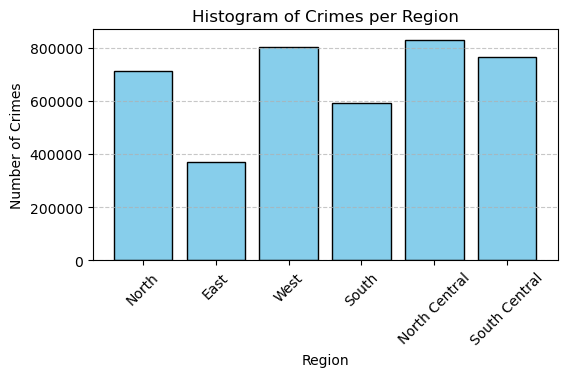

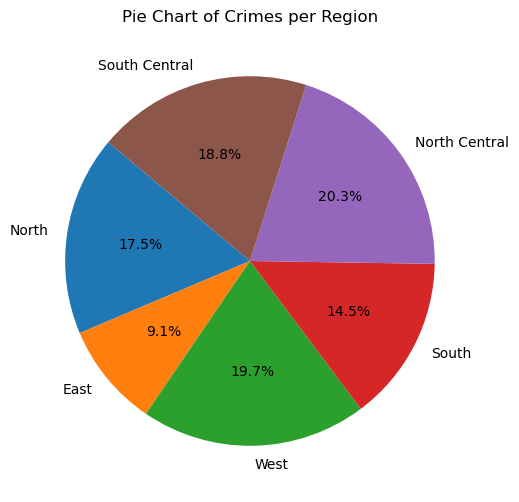

In [145]:
import matplotlib.pyplot as plt

# Sample data (replace with your data)
crimes_by_region = {'North': 711701, 'East': 370822, 'West': 803652, 'South': 590789, 'North Central': 826931, 'South Central': 765848}

# Create a histogram
plt.figure(figsize=(6, 3))
plt.bar(crimes_by_region.keys(), crimes_by_region.values(), color='skyblue', edgecolor='black')
plt.xlabel('Region')
plt.ylabel('Number of Crimes')
plt.title('Histogram of Crimes per Region')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.show()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(crimes_by_region.values(), labels=crimes_by_region.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Crimes per Region')

# Show the pie chart
plt.show()